In [1]:
!pip install scikit-learn
!pip install tensorflow
!pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 3.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.5 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 315.6 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.3 MB/s eta 0:00:0000:0100

In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import shutil
import tensorflow as tf  # Importar tensorflow
from tensorflow.keras import layers, models


2024-08-21 12:10:35.543235: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 12:10:35.547510: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 12:10:35.560371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 12:10:35.582014: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 12:10:35.588116: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 12:10:37.179532: W tensorflow/compiler/tf2tensorrt/utils/p

In [4]:
base_dir = "ruta_a_la_carpeta_base"

In [8]:


# Ruta donde están las imágenes
dataset_dir = "/home/sebas/PycharmProjects/tesisMnist/Mnist/train"

# Crear carpetas para train, val y test
base_dir = "ruta_a_la_carpeta_base"
os.makedirs(os.path.join(base_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'test'), exist_ok=True)

# Listar clases (carpetas)
classes = os.listdir(dataset_dir)

for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_dir)
    
    # Dividir en train y temp (que luego se dividirá en val y test)
    train_images, temp_images = train_test_split(images, test_size=0.4, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)  # 20% para val y 20% para test
    
    # Crear carpetas de clase en train, val y test
    os.makedirs(os.path.join(base_dir, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'val', class_name), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'test', class_name), exist_ok=True)
    
    # Mover las imágenes a sus respectivas carpetas
    for img in train_images:
        shutil.move(os.path.join(class_dir, img), os.path.join(base_dir, 'train', class_name, img))
        
    for img in val_images:
        shutil.move(os.path.join(class_dir, img), os.path.join(base_dir, 'val', class_name, img))
        
    for img in test_images:
        shutil.move(os.path.join(class_dir, img), os.path.join(base_dir, 'test', class_name, img))


FileNotFoundError: [Errno 2] No such file or directory: '/home/sebas/PycharmProjects/tesisMnist/Mnist/train'

2024-08-20 18:34:48.847179: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-20 18:34:49.078042: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-20 18:34:49.307917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 18:34:49.495274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 18:34:49.550042: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-20 18:34:51.886958: W tensorflow/compiler/tf2tensorrt/utils/p

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(base_dir, 'train'),
    image_size=(32, 32),  # Ajusta al tamaño de las imágenes
    batch_size=32,
    label_mode='categorical'  # Cambiar a 'int' si prefieres etiquetas como enteros
)

# Cargar datos de validación
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(base_dir, 'val'),
    image_size=(32, 32),
    batch_size=32,
    label_mode='categorical'
)

# Cargar datos de prueba
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(base_dir, 'test'),
    image_size=(32, 32),
    batch_size=32,
    label_mode='categorical'
)


Found 25196 files belonging to 10 classes.
Found 8399 files belonging to 10 classes.
Found 8405 files belonging to 10 classes.


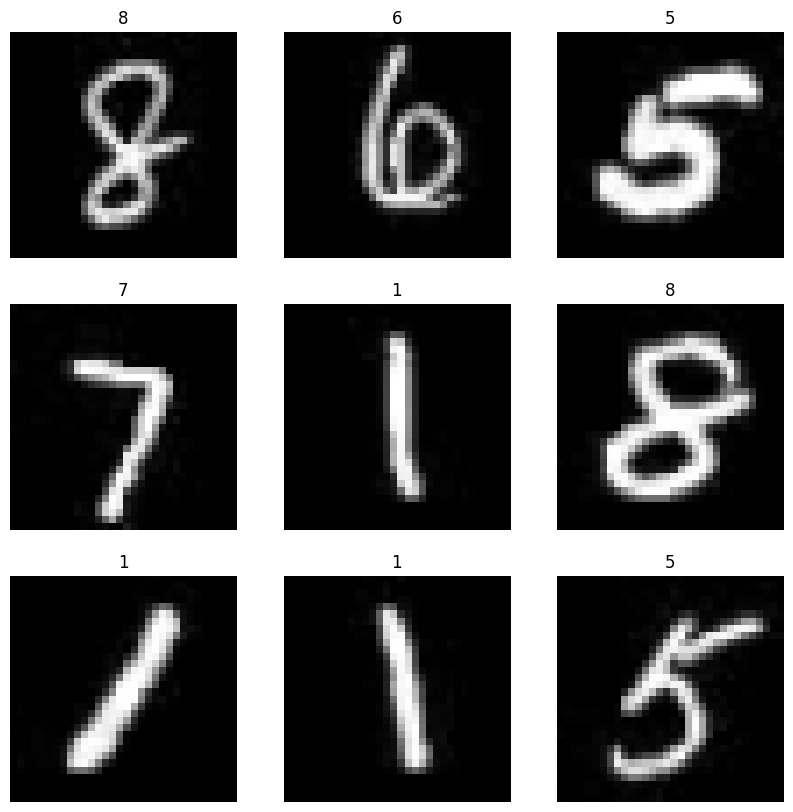

2024-08-21 12:11:31.138320: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
import matplotlib.pyplot as plt

for images, labels in train_ds.take(1):  # Tomar un batch de imágenes
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(tf.argmax(labels[i])))
        plt.axis("off")
    plt.show()

In [7]:

# Cargar MobileNetV2 con pesos preentrenados de ImageNet, sin la parte superior
base_model = tf.keras.applications.MobileNetV3Large(input_shape=(32, 32, 3),
                                               include_top=False,
                                               dropout_rate=0.2,

                                               weights='imagenet',classes=10)

# Congelar las capas del modelo base para que no se entrenen
base_model.trainable = False

/home/sebas/.pyenv/versions/3.10.12/lib/python3.10/site-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:

# Definir el modelo
model = models.Sequential([
    base_model,
    layers.Flatten(input_shape=(32, 32,3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Mostrar un resumen del modelo
model.summary()


/home/sebas/.pyenv/versions/3.10.12/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1, 1, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       123,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,120,650 (11.90 MB)

 Trainable params: 124,298 (485.54 KB)

 Non-trainable params: 2,996,352 (11.43 MB)

In [9]:
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall
from tensorflow.keras.metrics import AUC
from keras.callbacks import EarlyStopping

In [11]:
%load_ext tensorboard

In [18]:
checkpoint_filepath = './ckpt/checkpoint_{epoch}.keras'


In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./", histogram_freq=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,verbose=1)

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Cambiar a 'sparse_categorical_crossentropy' si las etiquetas no están en formato one-hot
    metrics=['accuracy', Precision(), Recall(), AUC()]
)


In [21]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Puedes ajustar el número de épocas,
    callbacks=[tensorboard_callback, model_checkpoint_callback, early_stopping]

)


Epoch 1/10
786/788 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6667 - auc: 0.9319 - loss: 1.0209 - precision: 0.7934 - recall: 0.5551
Epoch 1: saving model to ./ckpt/checkpoint_1.keras
788/788 ━━━━━━━━━━━━━━━━━━━━ 51s 53ms/step - accuracy: 0.6671 - auc: 0.9320 - loss: 1.0199 - precision: 0.7935 - recall: 0.5556 - val_accuracy: 0.8080 - val_auc: 0.9786 - val_loss: 0.5833 - val_precision: 0.8555 - val_recall: 0.7634
Epoch 2/10
786/788 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8320 - auc: 0.9830 - loss: 0.5083 - precision: 0.8767 - recall: 0.7931
Epoch 2: saving model to ./ckpt/checkpoint_2.keras
788/788 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8320 - auc: 0.9830 - loss: 0.5082 - precision: 0.8767 - recall: 0.7932 - val_accuracy: 0.8288 - val_auc: 0.9819 - val_loss: 0.5181 - val_precision: 0.8683 - val_recall: 0.7946
Epoch 3/10
787/788 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8623 - auc: 0.9878 - loss: 0.4258 - precision: 0.8960 - recall: 0.8297
Epoch 3: saving mo

In [24]:
%tensorboard --logdir './train'

In [25]:
test_acc = model.evaluate(test_ds)[1]


263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.8564 - auc: 0.9791 - loss: 0.5254 - precision: 0.8712 - recall: 0.8438


In [26]:
y_pred=model.predict(test_ds)
y_pred_label=np.argmax(y_pred, axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


In [27]:
import numpy as np
import tensorflow as tf

# Obtener las etiquetas verdaderas y las predicciones del modelo
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    preds = model.predict(images)
    predicted_labels.extend(np.argmax(preds, axis=1))  # Obtener la clase predicha
    true_labels.extend(np.argmax(labels, axis=1))  # Obtener la clase verdadera

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━

2024-08-21 13:28:44.539863: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


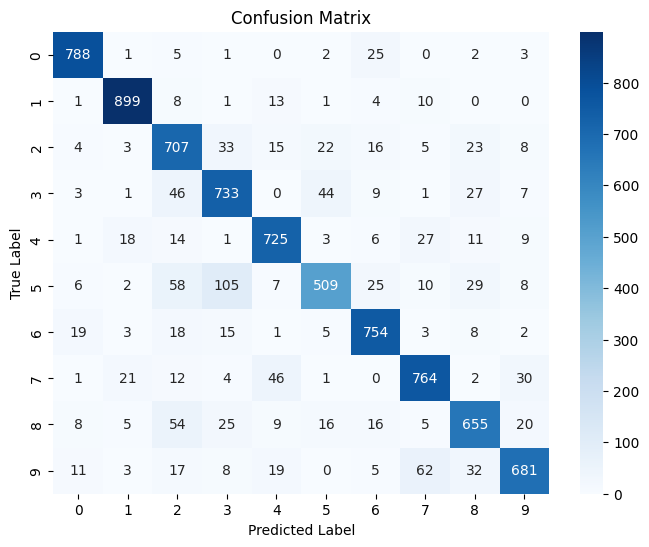

In [29]:
# Crear la matriz de confusión
cm = tf.math.confusion_matrix(labels=true_labels, predictions=predicted_labels)

# Convertir a numpy para facilitar la visualización
cm = cm.numpy()

# Visualizar la matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
